**Economic Development and the Regulation of Morally Contentious Activities**

*By Julio J. Elías, Nicola Lacetera, Mario Macis, and Paola Salardi*

Replicated by Saul Marenco

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
!pip install xlogit
from xlogit import MixedLogit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



db = pd.read_stata("/Users/saulmg/Downloads/EconomicDevelopmentAndTheRegulationOfMorallyContentiousActivities/113525-V1/P2017_1098_data/ELMS_PP2017.dta")
df_final = pd.read_excel("/Users/saulmg/Downloads/df_test.xlsx")

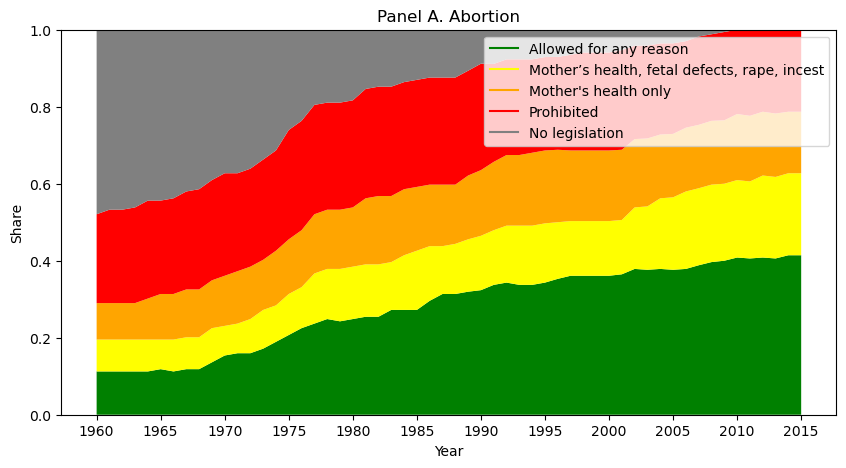

In [23]:
#Figure 1. Panel A: Abortion

##This figure graphs the the portion of countries that either allowed abortion for any reason, for mother's health only,
##allow it only for mother's health, health defects, rape or incest, prohibit it in for any reason, or have no legislation
##regarding abortion, from the year 1960 to 2015.

###This figure turned out exactly as the paper's.

index = db[db["abortionlaw_cat"].notnull()]

def calculate_sum_per_year(index):
    n_l=[]
    illegal=[]
    p1_3=[]
    p1_5=[]
    p1_7=[]
    
    for year in range(1960,2016):
        index1 = index[(index["year"] == year)]
        
        green = sum(index1["abortionlaw_cat"] == "Abortion permitted 1-7")
        
        yellow = sum(index1["abortionlaw_cat"] == "Abortion permitted 1-5")
        
        orange = sum(index1["abortionlaw_cat"] == "Abortion permitted 1-3")
            
        red = sum(index1["abortionlaw_cat"] == "Abortion illegal")
        
        grey = sum(index1["abortionlaw_cat"] == "Law not exist") + red + orange + yellow + green
        
        p1_7.append(green/grey)
        p1_5.append(yellow/grey)
        p1_3.append(orange/grey)
        illegal.append(red/grey)
        n_l.append(grey/grey/2)
        
    return illegal, p1_3, p1_5, p1_7, n_l

illegal, p1_3, p1_5, p1_7, n_l = calculate_sum_per_year(index)

plt.figure(figsize=(10, 5))

plt.plot([], [], color = "green", label = "Allowed for any reason")

plt.plot([], [], color = "yellow", label = "Mother’s health, fetal defects, rape, incest")

plt.plot([], [], color = "orange", label = "Mother's health only")

plt.plot([], [], color = "red", label = "Prohibited")

plt.plot([], [], color = "grey", label = "No legislation")

plt.stackplot([x for x in range(1960, 2016)], p1_7, p1_5, p1_3, illegal, n_l, baseline ="zero", 
              colors =["green", "yellow", "orange", "red", "grey"])

plt.ylim(0,1)
plt.xticks(range(1960, 2016, 5))

plt.legend()
 
plt.xlabel("Year")
plt.ylabel("Share")
plt.title("Panel A. Abortion")
 
plt.show()


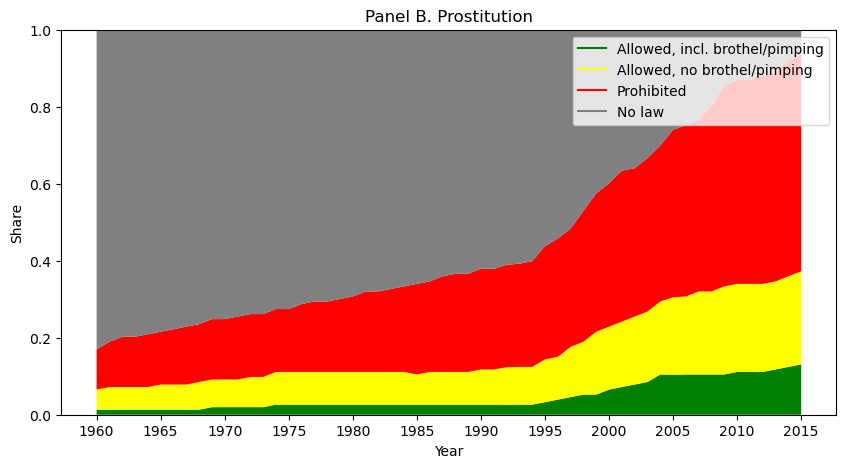

In [24]:
#Figure 1. Panel B: Prostitution

##This figure graphs the share of countries that either allow either prostitution including brothels and pimping,
##allow prostitution but no brothels or pimping, prohibit it completely, or have no law about it, from 1960
##through 2015.

###This figure matches exactly the paper's.

index = db[db["prostitutionlaw_cat"].notnull()]

def calculate_sum_per_year(index):
    n_l=[]
    illegal=[]
    p1=[]
    p2=[]
    
    for year in range(1960,2016):
        index1 = index[(index["year"] == year)]
        
        green = sum(index1["prostitutionlaw_cat"] == "Prostitution, brothel/pimping not illegal")
        
        yellow = sum(index1["prostitutionlaw_cat"] == "Prostitution not illegal, brothel/pimping yes")
                    
        red = sum(index1["prostitutionlaw_cat"] == "Prostitution illegal")
        
        grey = sum(index1["prostitutionlaw_cat"] == "Law not exist") + red + yellow + green
        
        p2.append(green/grey)
        p1.append(yellow/grey)
        illegal.append(red/grey)
        n_l.append(grey/grey)
        
    return illegal, p1, p2, n_l

illegal, p1, p2, n_l = calculate_sum_per_year(index)

plt.figure(figsize=(10, 5))

plt.plot([], [], color = "green", label = "Allowed, incl. brothel/pimping")

plt.plot([], [], color = "yellow", label = "Allowed, no brothel/pimping")

plt.plot([], [], color = "red", label = "Prohibited")

plt.plot([], [], color = "grey", label = "No law")

plt.stackplot([x for x in range(1960, 2016)], p2, p1, illegal, n_l, baseline ="zero", 
              colors =["green", "yellow", "red", "grey"])

plt.ylim(0,1)
plt.xticks(range(1960, 2016, 5))

plt.legend()
 
plt.xlabel("Year")
plt.ylabel("Share")
plt.title("Panel B. Prostitution")
 
plt.show()


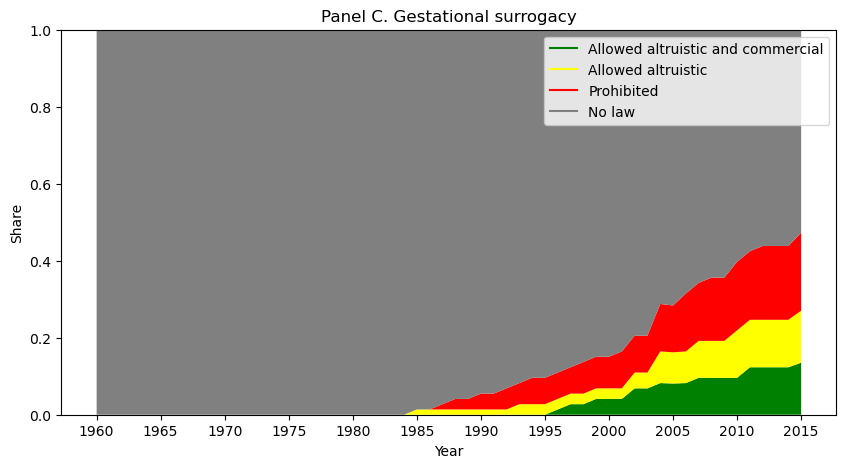

In [25]:
#Figure 1. Panel C: Gestational surrogancy

##This figure graphs the share of countries that either allow gestational surrogacy altruistically and commercially,
##allow it only altruistically, prohibit it, or don't have any laws about it, from 1960 through 2015.

###This figure matche's the paper's perfectly.

index = db[db["surrogacylaw_cat"].notnull()]

def calculate_sum_per_year(index):
    n_l=[]
    illegal=[]
    p1=[]
    p2=[]
    
    for year in range(1960,2016):
        index1 = index[(index["year"] == year)]
        
        green = sum(index1["surrogacylaw_cat"] == "Altruistic and commercial permitted")
        
        yellow = sum(index1["surrogacylaw_cat"] == "Altruistic permitted")
                    
        red = sum(index1["surrogacylaw_cat"] == "Surrogacy illegal")
        
        grey = sum(index1["surrogacylaw_cat"] == "Law not exist") + red + yellow + green
        
        p2.append(green/grey)
        p1.append(yellow/grey)
        illegal.append(red/grey)
        n_l.append(grey/grey)
        
    return illegal, p1, p2, n_l

illegal, p1, p2, n_l = calculate_sum_per_year(index)

plt.figure(figsize=(10, 5))

plt.plot([], [], color = "green", label = "Allowed altruistic and commercial")

plt.plot([], [], color = "yellow", label = "Allowed altruistic")

plt.plot([], [], color = "red", label = "Prohibited")

plt.plot([], [], color = "grey", label = "No law")


plt.stackplot([x for x in range(1960, 2016)], p2, p1, illegal, n_l, baseline ="zero", 
              colors =["green", "yellow", "red", "grey"])

plt.ylim(0,1)
plt.xticks(range(1960, 2016, 5))

plt.legend()

plt.xlabel("Year")
plt.ylabel("Share")
plt.title("Panel C. Gestational surrogacy")
 
plt.show()

         Current function value: 1.124502
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


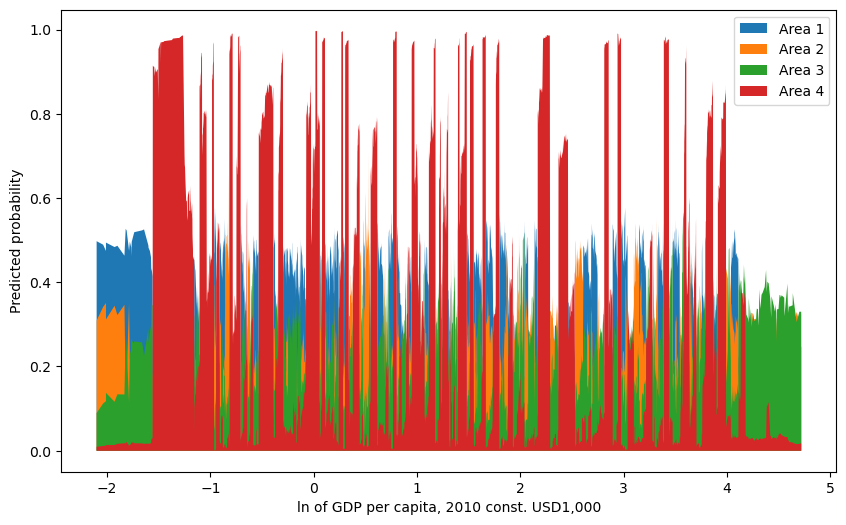

In [27]:
#Figure 2. Panel A: Abortion

##This figure is supposed to graph the predicted probabilities for abortion legislations,
##as a function of GDP per capita, controlling for legal origin, democracy, religion and
##women's political and economic rights.

###We were not able to replicate this figure in any sense except the format. Several attempts were
###made modifying the code by different individuals but this was the closest result possible. Also,
###everal different python models were used, from mnlogit to xlogit. We believe that the stata code
###given to us maybe inadequate to translate into python, which leaves room for suspicion
###regarding possible data and code manipulation.

formula = "abortionlaw_cat_fixed ~ lngdppc + legor_d2 + legor_d3 \
            + legor_d4 + legor_d5 + bmr_dem + ciri_wecon2 + ciri_wopol2 \
            + rel2 + rel3 + dyear23 + dyear24 + dyear25 + dyear26 + dyear27 \
            + dyear28 + dyear29 + dyear30 + dyear31 + dyear32 + dyear33 + dyear34 \
            + dyear35 + dyear36 + dyear37 + dyear38 + dyear39 + dyear40 + dyear41 + dyear42 \
            + dyear43 + dyear44 + dyear45 + dyear46 + dyear47 + dyear48 + dyear49 + dyear50 + dyear51"

model = smf.mnlogit(formula, data=df_final).fit(method="bfgs")
                                                
probs = model.predict(df_final)

plt.figure(figsize=(10,6))
lngdppc_sorted = df_final["lngdppc"].sort_values()
for i in range(1, 5):
    plt.fill_between(lngdppc_sorted, probs[i], label=f"Area {i}")
plt.xlabel("ln of GDP per capita, 2010 const. USD1,000")
plt.ylabel("Predicted probability")
plt.legend()
plt.show()